In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load data
LDAP = pd.read_csv('C:/Users/jeeva/Desktop/ML/LDAP.csv', low_memory=False)
#MSSQL = pd.read_csv('C:/Users/jeeva/Desktop/ML/MSSQL.csv', low_memory=False)
#NetBIOS = pd.read_csv('C:/Users/jeeva/Desktop/ML/NetBIOS.csv', low_memory=False)
Portmap = pd.read_csv('C:/Users/jeeva/Desktop/ML/Portmap.csv', low_memory=False)
#Syn = pd.read_csv('C:/Users/jeeva/Desktop/ML/Syn.csv', low_memory=False)
#UDP = pd.read_csv('C:/Users/jeeva/Desktop/ML/UDP.csv', low_memory=False)
UDPLag = pd.read_csv('C:/Users/jeeva/Desktop/ML/UDPLag.csv', low_memory=False)
data = pd.concat([LDAP,Portmap,UDPLag])
#data = pd.concat([LDAP,MSSQL,NetBIOS,Portmap,Syn,UDP,UDPLag])

# Clean up column names
data.columns = data.columns.str.strip()

In [3]:
%%time
# set the max columns to none
pd.set_option('display.max_columns', None)
data.describe()

Wall time: 6.17 s


,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030076e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3030093.0,3030093.0,3030093.0,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3030093.0,3.030093e+06,3.030093e+06,3030093.0,3.030093e+06,3.030093e+06,3.030093e+06,3030093.0,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3030093.0,3030093.0,3030093.0,3030093.0,3030093.0,3030093.0,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06,3.030093e+06
mean,8.791378e+04,9.955368e+03,3.272303e+04,1.475715e+01,1.241617e+06,3.901261e+00,2.670624e-01,1.962576e+03,4.577167e+01,9.661708e+02,9.643512e+02,9.649936e+02,8.142044e-01,1.827188e+00,6.195193e-01,9.508031e-01,3.718213e-01,inf,inf,1.039188e+05,1.723368e+05,4.664772e+05,3.063014e+02,1.240244e+06,1.389520e+05,1.906100e+05,4.657553e+05,3.021812e+02,4.710977e+05,9.338785e+04,1.611521e+05,3.427672e+05,3.382005e-01,7.808341e-04,0.0,0.0,0.0,-7.571951e+07,-9.691967e+03,1.483477e+06,1.536200e+03,9.643306e+02,9.669342e+02,9.650450e+02,9.896394e-01,2.590798e+02,0.0,5.511382e-05,7.808341e-04,0.0,2.012826e-01,2.444479e-03,1.089075e-03,0.0,6.779297e-02,1.445088e+03,9.649936e+02,9.508031e-01,-7.571951e+07,0.0,0.0,0.0,0.0,0.0,0.0,3.901261e+00,1.962576e+03,2.670624e-01,4.577167e+01,1.198160e+03,1.182902e+01,1.281334e+00,-3.767931e+07,3.187805e+03,4.954353e+03,1.001236e+04,4.195455e+02,3.388312e+05,1.078820e+05,4.595044e+05,2.352479e+05,9.956104e-01
std,1.399643e+05,1.844070e+04,1.897811e+04,4.433106e+00,8.338810e+06,3.728997e+02,1.857096e+01,1.354357e+03,3.405523e+04,6.543722e+02,6.556783e+02,6.550280e+02,1.114887e+01,5.259763e+01,4.495835e+00,1.719164e+01,1.581670e+01,NaN,NaN,7.231702e+05,1.175173e+06,3.212409e+06,8.526665e+04,8.337316e+06,9.368657e+05,1.300256e+06,3.211552e+06,8.528793e+04,4.764246e+06,9.490544e+05,1.648325e+06,3.431253e+06,3.510668e+00,2.793250e-02,0.0,0.0,0.0,3.986278e+08,6.688414e+06,8.075169e+05,9.932455e+03,6.556884e+02,6.548860e+02,6.549546e+02,1.606551e+01,1.159088e+04,0.0,7.423665e-03,2.793250e-02,0.0,4.009588e-01,4.938122e-02,3.298317e-02,0.0,2.595190e-01,9.845143e+02,6.550280e+

In [4]:
# Drop non-numeric columns and target variable
X = data.drop(columns=['Unnamed: 0', 'Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Label', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'])

In [5]:
# Check distribution of label coloum
label_distribution = data['Label'].value_counts()

label_distribution

LDAP       1905191
Syn         606749
NetBIOS     202919
Portmap     186960
UDP         112475
BENIGN       13926
UDPLag        1873
Name: Label, dtype: int64

In [6]:
%%time
# Label encode non-numeric 'SimillarHTTP' column and target variable 'Label'
le = LabelEncoder()
X['SimillarHTTP'] = le.fit_transform(X['SimillarHTTP'].astype(str))
y = le.fit_transform(data['Label'])

# Replace infinite values with NaN
X.replace([float('inf'), float('-inf')], np.nan, inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Feature importance extraction using Random Forest
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_imputed, y)
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_10_features = feature_importances.head(10)

# Sample data using stratified sampling
X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=0.6, stratify=y, random_state=42)

# Select top 10 features for training
X_sampled_top_features = X_sampled[top_10_features.index]

Wall time: 3min 4s


In [7]:
%%time
# Split sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled_top_features, y_sampled, test_size=0.4, stratify=y_sampled, 
        random_state=42)

# Train Random Forest classifier using top 10 features
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=le.classes_)

Wall time: 58.2 s


In [8]:
# Shape of X_train_imputed and X_test_imputed
X_train.shape, X_test.shape


((727222, 10), (484815, 10))

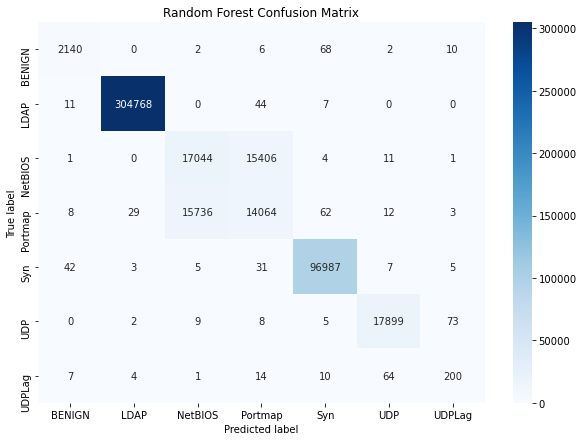

In [9]:
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, class_names):
    #Plot confusion matrix using seaborn heatmap.
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Random Forest Confusion Matrix')
    plt.show()

# plot confusion matrix
plot_confusion_matrix(cm_rf, le.classes_)

In [10]:
# Compute TP, FP, TN, FN, TPR, FPR for each class using confusion matrix.
def compute_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    metrics = {}

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes)) - tp
        fn = sum(confusion_matrix[i][j] for j in range(num_classes)) - tp
        tn = sum(confusion_matrix[j][k] for j in range(num_classes) for k in range(num_classes)) - tp - fp - fn
        
        # Calculate TPR and FPR
        tpr = tp / (tp + fn) if tp + fn != 0 else 0
        fpr = fp / (fp + tn) if fp + tn != 0 else 0

        metrics[f"Class_{i}"] = {"TP": tp, "FP": fp, "TN": tn, "FN": fn, "TPR": tpr, "FPR": fpr}

    return metrics

def print_metrics(metrics):
    for class_name, values in metrics.items():
        print(f"Metrics for {class_name}:")
        print(f"  True Positives (TP): {values['TP']}")
        print(f"  False Positives (FP): {values['FP']}")
        print(f"  True Negatives (TN): {values['TN']}")
        print(f"  False Negatives (FN): {values['FN']}")
        print(f"  True Positive Rate (TPR): {values['TPR']:.5f}")
        print(f"  False Positive Rate (FPR): {values['FPR']:.5f}")
        print("-" * 40)

# Display class information
print('Class 0 = BENIGN\n',  
      'Class 1 = LDAP\n',
      'Class 2= NetBIOS\n',
      'Class 3 = Portmap\n',
      'Class 4 = Syn\n',
      'Class 5 = UDP\n',
      'Class 6 = UDPLag\n')

# Compute and print metrics
results = compute_metrics(cm_rf)
print_metrics(results)

Class 0 = BENIGN
 Class 1 = LDAP
 Class 2= NetBIOS
 Class 3 = Portmap
 Class 4 = Syn
 Class 5 = UDP
 Class 6 = UDPLag

Metrics for Class_0:
  True Positives (TP): 2140
  False Positives (FP): 69
  True Negatives (TN): 482518
  False Negatives (FN): 88
  True Positive Rate (TPR): 0.96050
  False Positive Rate (FPR): 0.00014
----------------------------------------
Metrics for Class_1:
  True Positives (TP): 304768
  False Positives (FP): 38
  True Negatives (TN): 179947
  False Negatives (FN): 62
  True Positive Rate (TPR): 0.99980
  False Positive Rate (FPR): 0.00021
----------------------------------------
Metrics for Class_2:
  True Positives (TP): 17044
  False Positives (FP): 15753
  True Negatives (TN): 436595
  False Negatives (FN): 15423
  True Positive Rate (TPR): 0.52496
  False Positive Rate (FPR): 0.03482
----------------------------------------
Metrics for Class_3:
  True Positives (TP): 14064
  False Positives (FP): 15509
  True Negatives (TN): 439392
  False Negatives (FN

In [12]:
# Print overall TPR and FPR
def compute_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    metrics = {"TP": 0, "FP": 0, "TN": 0, "FN": 0, "TPR": 0, "FPR": 0}

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes)) - tp
        fn = sum(confusion_matrix[i][j] for j in range(num_classes)) - tp
        tn = sum(confusion_matrix[j][k] for j in range(num_classes) for k in range(num_classes)) - tp - fp - fn
        
        # Update overall metrics
        metrics["TP"] += tp
        metrics["FP"] += fp
        metrics["TN"] += tn
        metrics["FN"] += fn

    # Calculate overall TPR and FPR
    overall_tpr = metrics["TP"] / (metrics["TP"] + metrics["FN"]) if metrics["TP"] + metrics["FN"] != 0 else 0
    overall_fpr = metrics["FP"] / (metrics["FP"] + metrics["TN"]) if metrics["FP"] + metrics["TN"] != 0 else 0
    metrics["TPR"] = overall_tpr
    metrics["FPR"] = overall_fpr

    return metrics

result_rf = compute_metrics(cm_rf)
print("Overall Metrics:")
print(f"  True Positive Rate (TPR): {result_rf['TPR']:.5f}")
print(f"  False Positive Rate (FPR): {result_rf['FPR']:.5f}")


Overall Metrics:
  True Positive Rate (TPR): 0.93459
  False Positive Rate (FPR): 0.01090


In [13]:
print(top_10_features)

Fwd Packet Length Min     0.117336
Avg Fwd Segment Size      0.096968
Min Packet Length         0.090164
Fwd Packet Length Mean    0.080214
Subflow Fwd Bytes         0.075216
Max Packet Length         0.075025
Average Packet Size       0.068890
Destination Port          0.064970
Packet Length Mean        0.061496
Fwd Packet Length Max     0.048650
dtype: float64


In [14]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9345874199436899
Classification Report:
               precision    recall  f1-score   support

      BENIGN       0.97      0.96      0.96      2228
        LDAP       1.00      1.00      1.00    304830
     NetBIOS       0.52      0.52      0.52     32467
     Portmap       0.48      0.47      0.47     29914
         Syn       1.00      1.00      1.00     97080
         UDP       0.99      0.99      0.99     17996
      UDPLag       0.68      0.67      0.68       300

    accuracy                           0.93    484815
   macro avg       0.81      0.80      0.80    484815
weighted avg       0.93      0.93      0.93    484815



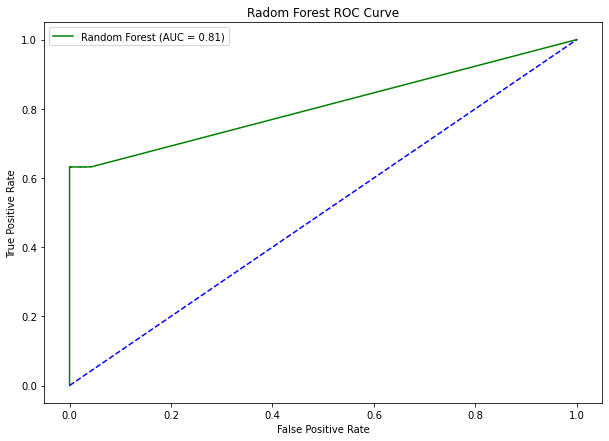

      Classifier  Accuracy  F1-Score  Precision   ROC AUC
0  Random Forest  0.934587  0.934561   0.934539  0.808128


In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# Positive classes (1) vs BENIGN (0)
positive_classes = ['LDAP', 'NetBIOS', 'Portmap', 'Syn', 'UDP', 'UDPLag']
y_binary = np.where(np.isin(le.inverse_transform(y_test), positive_classes), 1, 0)

# ROC curve using binary classification
y_pred_prob_binary = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_binary, y_pred_prob_binary)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Radom Forest ROC Curve')
plt.legend()
plt.show()

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average='weighted')
precision_rf = precision_score(y_test, y_pred, average='weighted')

# Display consolidated results
results_rf = pd.DataFrame({
    'Classifier': ['Random Forest'],
    'Accuracy': [accuracy_rf],
    'F1-Score': [f1_rf],
    'Precision': [precision_rf],
    'ROC AUC': [roc_auc]
})

print(results_rf)



In [ ]:
#K nearest Neigbors

In [16]:
%%time
from sklearn.neighbors import KNeighborsClassifier

#Initalise k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Default value for k = 5

# Train k-NN classifier on sampled data using top 10 features
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Evaluate model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn, target_names=le.classes_)

accuracy_knn, classification_rep_knn

Wall time: 6min 45s


(0.933710796901911,
 '              precision    recall  f1-score   support\n\n      BENIGN       0.98      0.83      0.90      2228\n        LDAP       1.00      1.00      1.00    304830\n     NetBIOS       0.52      0.54      0.53     32467\n     Portmap       0.48      0.46      0.47     29914\n         Syn       1.00      1.00      1.00     97080\n         UDP       0.98      1.00      0.99     17996\n      UDPLag       0.32      0.03      0.06       300\n\n    accuracy                           0.93    484815\n   macro avg       0.75      0.69      0.71    484815\nweighted avg       0.93      0.93      0.93    484815\n')

In [17]:
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print("Classification Report:\n", classification_rep)

Accuracy: 93.37%
Classification Report:
               precision    recall  f1-score   support

      BENIGN       0.97      0.96      0.96      2228
        LDAP       1.00      1.00      1.00    304830
     NetBIOS       0.52      0.52      0.52     32467
     Portmap       0.48      0.47      0.47     29914
         Syn       1.00      1.00      1.00     97080
         UDP       0.99      0.99      0.99     17996
      UDPLag       0.68      0.67      0.68       300

    accuracy                           0.93    484815
   macro avg       0.81      0.80      0.80    484815
weighted avg       0.93      0.93      0.93    484815



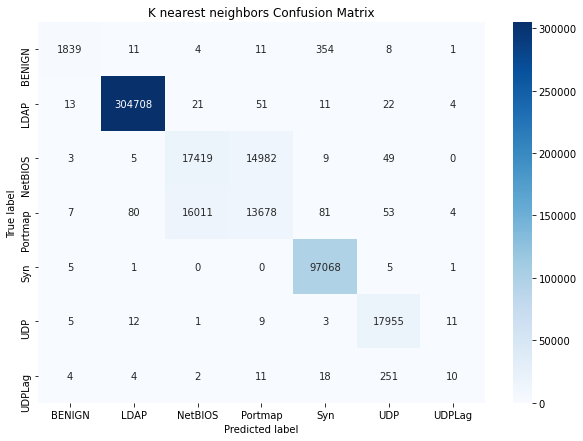

In [18]:
# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, class_names):
    #Plot confusion matrix using seaborn heatmap.
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('K nearest neighbors Confusion Matrix')
    plt.show()

# plot confusion matrix
plot_confusion_matrix(cm_knn, le.classes_)

In [19]:
#Compute TP, FP, TN, FN, TPR, FPR for each class using confusion matrix.
def compute_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    metrics = {}

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes)) - tp
        fn = sum(confusion_matrix[i][j] for j in range(num_classes)) - tp
        tn = sum(confusion_matrix[j][k] for j in range(num_classes) for k in range(num_classes)) - tp - fp - fn
        
        # Calculate TPR and FPR
        tpr = tp / (tp + fn) if tp + fn != 0 else 0
        fpr = fp / (fp + tn) if fp + tn != 0 else 0

        metrics[f"Class_{i}"] = {"TP": tp, "FP": fp, "TN": tn, "FN": fn, "TPR": tpr, "FPR": fpr}

    return metrics

def print_metrics(metrics):
    for class_name, values in metrics.items():
        print(f"Metrics for {class_name}:")
        print(f"  True Positives (TP): {values['TP']}")
        print(f"  False Positives (FP): {values['FP']}")
        print(f"  True Negatives (TN): {values['TN']}")
        print(f"  False Negatives (FN): {values['FN']}")
        print(f"  True Positive Rate (TPR): {values['TPR']:.5f}")
        print(f"  False Positive Rate (FPR): {values['FPR']:.5f}")
        print("-" * 40)
        

# Display class information
print('Class 0 = BENIGN\n',  
      'Class 1 = LDAP\n',
      'Class 2= NetBIOS\n',
      'Class 3 = Portmap\n',
      'Class 4 = Syn\n',
      'Class 5 = UDP\n',
      'Class 6 = UDPLag\n')

# Compute and print metrics
result_knn = compute_metrics(cm_knn)
print_metrics(result_knn)

Class 0 = BENIGN
 Class 1 = LDAP
 Class 2= NetBIOS
 Class 3 = Portmap
 Class 4 = Syn
 Class 5 = UDP
 Class 6 = UDPLag

Metrics for Class_0:
  True Positives (TP): 1839
  False Positives (FP): 37
  True Negatives (TN): 482550
  False Negatives (FN): 389
  True Positive Rate (TPR): 0.82540
  False Positive Rate (FPR): 0.00008
----------------------------------------
Metrics for Class_1:
  True Positives (TP): 304708
  False Positives (FP): 113
  True Negatives (TN): 179872
  False Negatives (FN): 122
  True Positive Rate (TPR): 0.99960
  False Positive Rate (FPR): 0.00063
----------------------------------------
Metrics for Class_2:
  True Positives (TP): 17419
  False Positives (FP): 16039
  True Negatives (TN): 436309
  False Negatives (FN): 15048
  True Positive Rate (TPR): 0.53651
  False Positive Rate (FPR): 0.03546
----------------------------------------
Metrics for Class_3:
  True Positives (TP): 13678
  False Positives (FP): 15064
  True Negatives (TN): 439837
  False Negatives 

In [20]:
# Print overall TPR and FPR
def compute_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    metrics = {"TP": 0, "FP": 0, "TN": 0, "FN": 0, "TPR": 0, "FPR": 0}

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes)) - tp
        fn = sum(confusion_matrix[i][j] for j in range(num_classes)) - tp
        tn = sum(confusion_matrix[j][k] for j in range(num_classes) for k in range(num_classes)) - tp - fp - fn
        
        # Update overall metrics
        metrics["TP"] += tp
        metrics["FP"] += fp
        metrics["TN"] += tn
        metrics["FN"] += fn

    # Calculate overall TPR and FPR
    overall_tpr = metrics["TP"] / (metrics["TP"] + metrics["FN"]) if metrics["TP"] + metrics["FN"] != 0 else 0
    overall_fpr = metrics["FP"] / (metrics["FP"] + metrics["TN"]) if metrics["FP"] + metrics["TN"] != 0 else 0
    metrics["TPR"] = overall_tpr
    metrics["FPR"] = overall_fpr

    return metrics

result_knn = compute_metrics(cm_knn)
print("Overall Metrics:")
print(f"  True Positive Rate (TPR): {result_knn['TPR']:.5f}")
print(f"  False Positive Rate (FPR): {result_knn['FPR']:.5f}")


Overall Metrics:
  True Positive Rate (TPR): 0.93371
  False Positive Rate (FPR): 0.01105


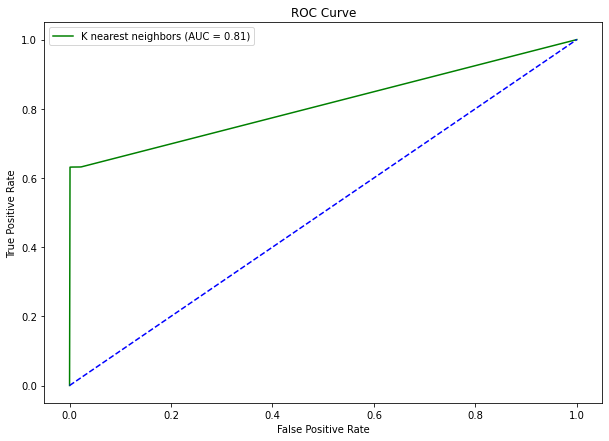

  Classifier  Accuracy  F1-Score  Precision   ROC AUC
0        KNN  0.934587  0.934561   0.934539  0.811438


In [21]:
# Positive classes (1) vs BENIGN (0) 
positive_classes1 = ['LDAP', 'NetBIOS', 'Portmap', 'Syn', 'UDP', 'UDPLag']
y_binary = np.where(np.isin(le.inverse_transform(y_test), positive_classes1), 1, 0)

# ROC curve for the binary classification 
y_pred_prob_binary = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_binary, y_pred_prob_binary)
roc_auc_knn = auc(fpr, tpr)

# Generate the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='K nearest neighbors (AUC = %0.2f)' % roc_auc_knn, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred, average='weighted')
precision_knn = precision_score(y_test, y_pred, average='weighted')

# Display results
results_knn = pd.DataFrame({
    'Classifier': ['KNN'],
    'Accuracy': [accuracy_knn],
    'F1-Score': [f1_knn],
    'Precision': [precision_knn],
    'ROC AUC': [roc_auc_knn]
})

print(results_knn)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


In [22]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Neural Network 

In [24]:
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# From training labels earlier 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

In [25]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:
history = model.fit(X_train_scaled, y_train_onehot, epochs=50, batch_size=256, validation_data=(X_test_scaled, y_test_onehot))


Epoch 1/50
2841/2841 [==============================] - 5s 2ms/step - loss: 0.1798 - accuracy: 0.9141 - val_loss: 0.1132 - val_accuracy: 0.9283
Epoch 2/50
2841/2841 [==============================] - 5s 2ms/step - loss: 0.1107 - accuracy: 0.9325 - val_loss: 0.1088 - val_accuracy: 0.9344
Epoch 3/50
2841/2841 [==============================] - 4s 2ms/step - loss: 0.1082 - accuracy: 0.9334 - val_loss: 0.1064 - val_accuracy: 0.9354
Epoch 4/50
2841/2841 [==============================] - 5s 2ms/step - loss: 0.1072 - accuracy: 0.9337 - val_loss: 0.1060 - val_accuracy: 0.9350
Epoch 5/50
2841/2841 [==============================] - 4s 1ms/step - loss: 0.1064 - accuracy: 0.9333 - val_loss: 0.1098 - val_accuracy: 0.9320
Epoch 6/50
2841/2841 [==============================] - 4s 1ms/step - loss: 0.1059 - accuracy: 0.9335 - val_loss: 0.1051 - val_accuracy: 0.9352
Epoch 7/50
2841/2841 [==============================] - 4s 2ms/step - loss: 0.1055 - accuracy: 0.9337 - val_loss: 0.1047 - val_accuracy:

In [27]:
test_loss, accuracy_nn = model.evaluate(X_test_scaled, y_test_onehot)
print(f"Accuracy: {accuracy_nn * 100:.2f}%")


15151/15151 [==============================] - 8s 499us/step - loss: 0.1039 - accuracy: 0.9351
Accuracy: 93.51%


In [28]:
from sklearn.metrics import classification_report

# Predict classes
y_pred_probs = model.predict(X_test_scaled)

# Convert predictions from one-hot encoding to label encoding
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.65      0.71      2228
           1       1.00      1.00      1.00    304830
           2       0.52      1.00      0.68     32467
           3       0.48      0.00      0.01     29914
           4       0.99      1.00      0.99     97080
           5       0.98      1.00      0.99     17996
           6       0.47      0.03      0.05       300

    accuracy                           0.94    484815
   macro avg       0.75      0.67      0.63    484815
weighted avg       0.93      0.94      0.91    484815



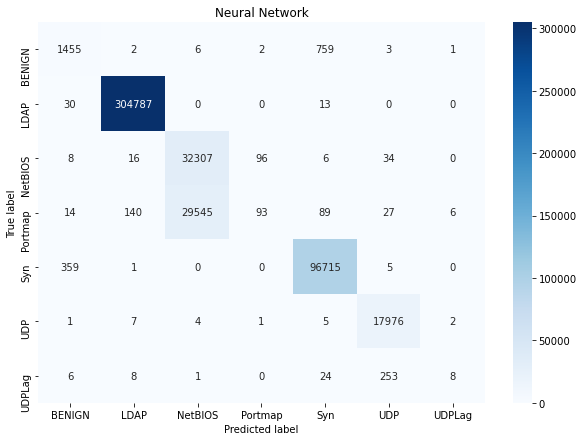

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use model to predict on test set
y_pred_probs = model.predict(X_test_scaled)

# Convert from one-hot encoded to label format
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm_keras = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(confusion_matrix, class_names, title):
    # Plot confusion matrix using seaborn heatmap.
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()


plot_title = 'Neural Network' 
class_names = le.classes_ 
plot_confusion_matrix(cm_keras, class_names, plot_title)


In [30]:
# Compute TP, FP, TN, FN, TPR, FPR for each class using confusion matrix.
def compute_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    metrics = {}

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes)) - tp
        fn = sum(confusion_matrix[i][j] for j in range(num_classes)) - tp
        tn = sum(confusion_matrix[j][k] for j in range(num_classes) for k in range(num_classes)) - tp - fp - fn
        
        # Calculate TPR and FPR
        tpr = tp / (tp + fn) if tp + fn != 0 else 0
        fpr = fp / (fp + tn) if fp + tn != 0 else 0

        metrics[f"Class_{i}"] = {"TP": tp, "FP": fp, "TN": tn, "FN": fn, "TPR": tpr, "FPR": fpr}

    return metrics

def print_metrics(metrics):
    for class_name, values in metrics.items():
        print(f"Metrics for {class_name}:")
        print(f"  True Positives (TP): {values['TP']}")
        print(f"  False Positives (FP): {values['FP']}")
        print(f"  True Negatives (TN): {values['TN']}")
        print(f"  False Negatives (FN): {values['FN']}")
        print(f"  True Positive Rate (TPR): {values['TPR']:.5f}")
        print(f"  False Positive Rate (FPR): {values['FPR']:.5f}")
        print("-" * 40)

# Display class information
print('Class 0 = BENIGN\n',  
      'Class 1 = LDAP\n',
      'Class 2= NetBIOS\n',
      'Class 3 = Portmap\n',
      'Class 4 = Syn\n',
      'Class 5 = UDP\n',
      'Class 6 = UDPLag\n')

# Compute and print metrics
results = compute_metrics(cm_keras)
print_metrics(results)

Class 0 = BENIGN
 Class 1 = LDAP
 Class 2= NetBIOS
 Class 3 = Portmap
 Class 4 = Syn
 Class 5 = UDP
 Class 6 = UDPLag

Metrics for Class_0:
  True Positives (TP): 1455
  False Positives (FP): 418
  True Negatives (TN): 482169
  False Negatives (FN): 773
  True Positive Rate (TPR): 0.65305
  False Positive Rate (FPR): 0.00087
----------------------------------------
Metrics for Class_1:
  True Positives (TP): 304787
  False Positives (FP): 174
  True Negatives (TN): 179811
  False Negatives (FN): 43
  True Positive Rate (TPR): 0.99986
  False Positive Rate (FPR): 0.00097
----------------------------------------
Metrics for Class_2:
  True Positives (TP): 32307
  False Positives (FP): 29556
  True Negatives (TN): 422792
  False Negatives (FN): 160
  True Positive Rate (TPR): 0.99507
  False Positive Rate (FPR): 0.06534
----------------------------------------
Metrics for Class_3:
  True Positives (TP): 93
  False Positives (FP): 99
  True Negatives (TN): 454802
  False Negatives (FN): 29

In [31]:
# Print overall TPR and FPR
def compute_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    metrics = {"TP": 0, "FP": 0, "TN": 0, "FN": 0, "TPR": 0, "FPR": 0}

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes)) - tp
        fn = sum(confusion_matrix[i][j] for j in range(num_classes)) - tp
        tn = sum(confusion_matrix[j][k] for j in range(num_classes) for k in range(num_classes)) - tp - fp - fn
        
        # Update overall metrics
        metrics["TP"] += tp
        metrics["FP"] += fp
        metrics["TN"] += tn
        metrics["FN"] += fn

    # Calculate overall TPR and FPR
    overall_tpr = metrics["TP"] / (metrics["TP"] + metrics["FN"]) if metrics["TP"] + metrics["FN"] != 0 else 0
    overall_fpr = metrics["FP"] / (metrics["FP"] + metrics["TN"]) if metrics["FP"] + metrics["TN"] != 0 else 0
    metrics["TPR"] = overall_tpr
    metrics["FPR"] = overall_fpr

    return metrics

result_nn = compute_metrics(cm_keras)
print("Overall Metrics:")
print(f"  True Positive Rate (TPR): {result_nn['TPR']:.5f}")
print(f"  False Positive Rate (FPR): {result_nn['FPR']:.5f}")

Overall Metrics:
  True Positive Rate (TPR): 0.93508
  False Positive Rate (FPR): 0.01082


Instructions for updating:
Please use `model.predict()` instead.


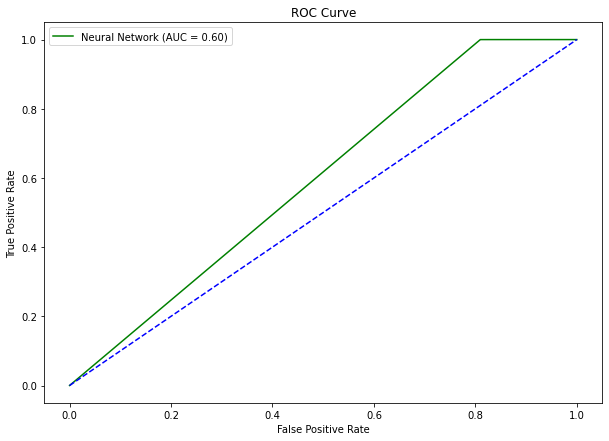

       Classifier  Accuracy  F1-Score  Precision   ROC AUC
0  Neural Network   0.93508   0.91379   0.931987  0.595115


In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#  Positive classes (1) vs BENIGN (0)
positive_classes1 = ['LDAP', 'NetBIOS', 'Portmap', 'Syn', 'UDP', 'UDPLag']
y_binary = np.where(np.isin(le.inverse_transform(y_test), positive_classes1), 1, 0)

# Compute ROC curve for the binary classification
y_pred_prob_binary = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_binary, y_pred_prob_binary)
roc_auc_nn = auc(fpr, tpr)

# Generate the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Neural Network (AUC = %0.2f)' % roc_auc_nn, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate metrics
#accuracy_nn = test_accuracy(y_test, y_pred)
f1_nn = f1_score(y_test, y_pred, average='weighted')
precision_nn = precision_score(y_test, y_pred, average='weighted')

# Display consolidated results
results_nn = pd.DataFrame({
    'Classifier': ['Neural Network'],
    'Accuracy': [accuracy_nn],
    'F1-Score': [f1_nn],
    'Precision': [precision_nn],
    'ROC AUC': [roc_auc_nn]
})

print(results_nn)

In [33]:
# Autoencoder

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 5
input_dim = X_train_scaled.shape[1]

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoding layers
encoded = Dense(7, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(7, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Build autoencoder model
autoencoder = Model(input_layer, decoded)

# Extract encoder (//use later//)
encoder = Model(input_layer, encoded)

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
%%time
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test_scaled, X_test_scaled))

Epoch 1/50
2841/2841 [==============================] - 3s 1ms/step - loss: 0.6626 - val_loss: 0.6365
Epoch 2/50
2841/2841 [==============================] - 2s 872us/step - loss: 0.6268 - val_loss: 0.6364
Epoch 3/50
2841/2841 [==============================] - 2s 861us/step - loss: 0.6268 - val_loss: 0.6364
Epoch 4/50
2841/2841 [==============================] - 2s 872us/step - loss: 0.6268 - val_loss: 0.6363TA: 0s - l
Epoch 5/50
2841/2841 [==============================] - 3s 900us/step - loss: 0.6268 - val_loss: 0.6363
Epoch 6/50
2841/2841 [==============================] - 3s 883us/step - loss: 0.6267 - val_loss: 0.6363
Epoch 7/50
2841/2841 [==============================] - 3s 883us/step - loss: 0.6267 - val_loss: 0.6363
Epoch 8/50
2841/2841 [==============================] - 3s 883us/step - loss: 0.6267 - val_loss: 0.6363
Epoch 9/50
2841/2841 [==============================] - 3s 889us/step - loss: 0.6267 - val_loss: 0.6363
Epoch 10/50
2841/2841 [==============================] -

In [37]:
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)


In [38]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf1 = RandomForestClassifier(n_estimators=50)
clf1.fit(X_train_encoded, y_train)

y_pred = clf1.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.45%


In [39]:
classification_rep_auto = classification_report(y_test, y_pred, target_names=le.classes_)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep_auto)

Accuracy: 0.9345028516031888
Classification Report:
               precision    recall  f1-score   support

      BENIGN       0.97      0.93      0.95      2228
        LDAP       1.00      1.00      1.00    304830
     NetBIOS       0.52      0.53      0.52     32467
     Portmap       0.48      0.47      0.47     29914
         Syn       1.00      1.00      1.00     97080
         UDP       0.99      0.99      0.99     17996
      UDPLag       0.65      0.54      0.59       300

    accuracy                           0.93    484815
   macro avg       0.80      0.78      0.79    484815
weighted avg       0.93      0.93      0.93    484815



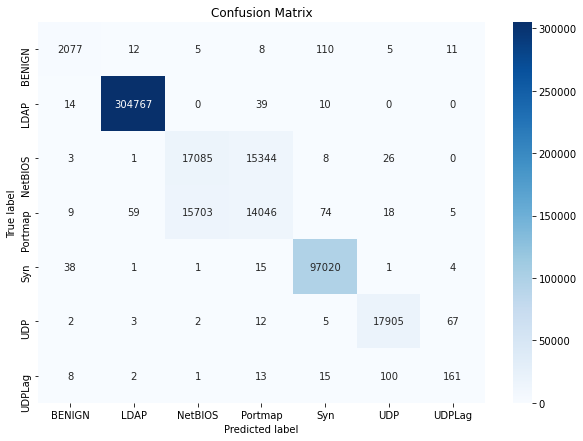

In [40]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix 
cm_rf_encoded = confusion_matrix(y_test, y_pred)


def plot_confusion_matrix(confusion_matrix, class_names):

    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

# Show confusion matrix
plot_confusion_matrix(cm_rf_encoded, le.classes_)


In [41]:
# Compute TP, FP, TN, FN, TPR, FPR for each class using confusion matrix.
def compute_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    metrics = {}

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes)) - tp
        fn = sum(confusion_matrix[i][j] for j in range(num_classes)) - tp
        tn = sum(confusion_matrix[j][k] for j in range(num_classes) for k in range(num_classes)) - tp - fp - fn
        
        # Calculate TPR and FPR
        tpr = tp / (tp + fn) if tp + fn != 0 else 0
        fpr = fp / (fp + tn) if fp + tn != 0 else 0

        metrics[f"Class_{i}"] = {"TP": tp, "FP": fp, "TN": tn, "FN": fn, "TPR": tpr, "FPR": fpr}

    return metrics

def print_metrics(metrics):
    for class_name, values in metrics.items():
        print(f"Metrics for {class_name}:")
        print(f"  True Positives (TP): {values['TP']}")
        print(f"  False Positives (FP): {values['FP']}")
        print(f"  True Negatives (TN): {values['TN']}")
        print(f"  False Negatives (FN): {values['FN']}")
        print(f"  True Positive Rate (TPR): {values['TPR']:.5f}")
        print(f"  False Positive Rate (FPR): {values['FPR']:.5f}")
        print("-" * 40)

# Display class information
print('Class 0 = BENIGN\n',  
      'Class 1 = LDAP\n',
      'Class 2= NetBIOS\n',
      'Class 3 = Portmap\n',
      'Class 4 = Syn\n',
      'Class 5 = UDP\n',
      'Class 6 = UDPLag\n')

# Compute and print metrics
results = compute_metrics(cm_rf_encoded)
print_metrics(results)

Class 0 = BENIGN
 Class 1 = LDAP
 Class 2= NetBIOS
 Class 3 = Portmap
 Class 4 = Syn
 Class 5 = UDP
 Class 6 = UDPLag

Metrics for Class_0:
  True Positives (TP): 2077
  False Positives (FP): 74
  True Negatives (TN): 482513
  False Negatives (FN): 151
  True Positive Rate (TPR): 0.93223
  False Positive Rate (FPR): 0.00015
----------------------------------------
Metrics for Class_1:
  True Positives (TP): 304767
  False Positives (FP): 78
  True Negatives (TN): 179907
  False Negatives (FN): 63
  True Positive Rate (TPR): 0.99979
  False Positive Rate (FPR): 0.00043
----------------------------------------
Metrics for Class_2:
  True Positives (TP): 17085
  False Positives (FP): 15712
  True Negatives (TN): 436636
  False Negatives (FN): 15382
  True Positive Rate (TPR): 0.52623
  False Positive Rate (FPR): 0.03473
----------------------------------------
Metrics for Class_3:
  True Positives (TP): 14046
  False Positives (FP): 15431
  True Negatives (TN): 439470
  False Negatives (F

In [42]:
# Print overall TPR and FPR
def compute_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    metrics = {"TP": 0, "FP": 0, "TN": 0, "FN": 0, "TPR": 0, "FPR": 0}

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes)) - tp
        fn = sum(confusion_matrix[i][j] for j in range(num_classes)) - tp
        tn = sum(confusion_matrix[j][k] for j in range(num_classes) for k in range(num_classes)) - tp - fp - fn
        
        # Update overall metrics
        metrics["TP"] += tp
        metrics["FP"] += fp
        metrics["TN"] += tn
        metrics["FN"] += fn

    # Calculate overall TPR and FPR
    overall_tpr = metrics["TP"] / (metrics["TP"] + metrics["FN"]) if metrics["TP"] + metrics["FN"] != 0 else 0
    overall_fpr = metrics["FP"] / (metrics["FP"] + metrics["TN"]) if metrics["FP"] + metrics["TN"] != 0 else 0
    metrics["TPR"] = overall_tpr
    metrics["FPR"] = overall_fpr

    return metrics

result_auto = compute_metrics(cm_rf_encoded)
print("Overall Metrics:")
print(f"  True Positive Rate (TPR): {result_auto['TPR']:.5f}")
print(f"  False Positive Rate (FPR): {result_auto['FPR']:.5f}")


Overall Metrics:
  True Positive Rate (TPR): 0.93450
  False Positive Rate (FPR): 0.01092


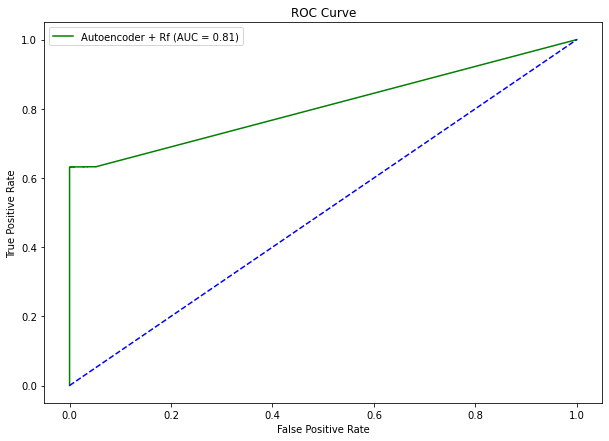

        Classifier  Accuracy  F1-Score  Precision   ROC AUC
0  Autoencoder +Rf  0.934503  0.934402   0.934316  0.806652


In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# Create a binary problem: Positive classes (1) vs BENIGN (0) 
positive_classes1 = ['LDAP', 'NetBIOS', 'Portmap', 'Syn', 'UDP', 'UDPLag']
y_binary = np.where(np.isin(le.inverse_transform(y_test), positive_classes1), 1, 0)

# Compute ROC curve for the binary classificat
y_pred_prob_binary = clf1.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_binary, y_pred_prob_binary)
roc_auc_auto = auc(fpr, tpr)

# Generate the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Autoencoder + Rf (AUC = %0.2f)' % roc_auc_auto, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate metrics
#accuracy_auto = test_accuracy(y_test, y_pred)
f1_auto = f1_score(y_test, y_pred, average='weighted')
precision_auto = precision_score(y_test, y_pred, average='weighted')

# Display results
results_auto = pd.DataFrame({
    'Classifier': ['Autoencoder +Rf'],
    'Accuracy': [accuracy],
    'F1-Score': [f1_auto],
    'Precision': [precision_auto],
    'ROC AUC': [roc_auc_auto]
})

print(results_auto)

In [44]:
# Naive bayes classifier

In [45]:
from sklearn.naive_bayes import GaussianNB
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.4, random_state=42)

# Initalise Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test set and evaluate model
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
classification_rep_gnb = classification_report(y_test, y_pred_gnb, target_names=le.classes_)

accuracy_gnb, classification_rep_gnb
print(f"Accuracy: {accuracy_gnb * 100:.2f}%")

Accuracy: 65.77%


In [46]:
print("Accuracy:", accuracy_gnb)
print("Classification Report:\n", classification_rep_gnb)

Accuracy: 0.6577161772155659
Classification Report:
               precision    recall  f1-score   support

      BENIGN       0.17      0.13      0.15      5618
        LDAP       0.74      0.98      0.84    761721
     NetBIOS       0.00      0.00      0.00     81117
     Portmap       0.11      0.00      0.00     74778
         Syn       0.99      0.10      0.18    243010
         UDP       0.15      0.57      0.24     45050
      UDPLag       0.02      0.02      0.02       744

    accuracy                           0.66   1212038
   macro avg       0.31      0.26      0.20   1212038
weighted avg       0.67      0.66      0.57   1212038



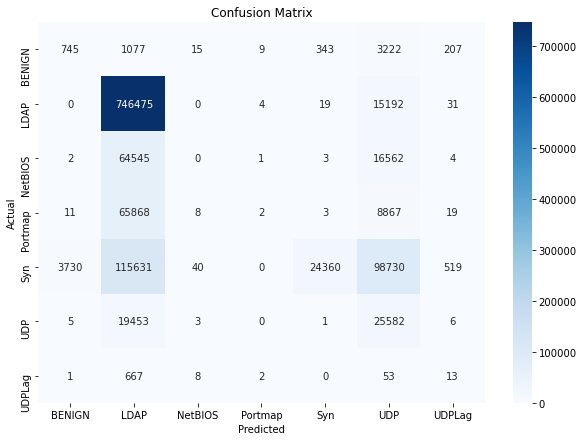

In [47]:
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, class_names):

    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()


# Compute confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Plotting confusion matrix 
plot_confusion_matrix(cm_gnb, le.classes_)

In [48]:
# Compute TP, FP, TN, FN, TPR, FPR for each class using confusion matrix.
def compute_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    metrics = {}

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes)) - tp
        fn = sum(confusion_matrix[i][j] for j in range(num_classes)) - tp
        tn = sum(confusion_matrix[j][k] for j in range(num_classes) for k in range(num_classes)) - tp - fp - fn
        
        # Calculate TPR and FPR
        tpr = tp / (tp + fn) if tp + fn != 0 else 0
        fpr = fp / (fp + tn) if fp + tn != 0 else 0

        metrics[f"Class_{i}"] = {"TP": tp, "FP": fp, "TN": tn, "FN": fn, "TPR": tpr, "FPR": fpr}

    return metrics

def print_metrics(metrics):
    for class_name, values in metrics.items():
        print(f"Metrics for {class_name}:")
        print(f"  True Positives (TP): {values['TP']}")
        print(f"  False Positives (FP): {values['FP']}")
        print(f"  True Negatives (TN): {values['TN']}")
        print(f"  False Negatives (FN): {values['FN']}")
        print(f"  True Positive Rate (TPR): {values['TPR']:.5f}")
        print(f"  False Positive Rate (FPR): {values['FPR']:.5f}")
        print("-" * 40)

# Display class information
print('Class 0 = BENIGN\n',  
      'Class 1 = LDAP\n',
      'Class 2= NetBIOS\n',
      'Class 3 = Portmap\n',
      'Class 4 = Syn\n',
      'Class 5 = UDP\n',
      'Class 6 = UDPLag\n')

# Compute and print metrics
results = compute_metrics(cm_gnb)
print_metrics(results)

Class 0 = BENIGN
 Class 1 = LDAP
 Class 2= NetBIOS
 Class 3 = Portmap
 Class 4 = Syn
 Class 5 = UDP
 Class 6 = UDPLag

Metrics for Class_0:
  True Positives (TP): 745
  False Positives (FP): 3749
  True Negatives (TN): 1202671
  False Negatives (FN): 4873
  True Positive Rate (TPR): 0.13261
  False Positive Rate (FPR): 0.00311
----------------------------------------
Metrics for Class_1:
  True Positives (TP): 746475
  False Positives (FP): 267241
  True Negatives (TN): 183076
  False Negatives (FN): 15246
  True Positive Rate (TPR): 0.97998
  False Positive Rate (FPR): 0.59345
----------------------------------------
Metrics for Class_2:
  True Positives (TP): 0
  False Positives (FP): 74
  True Negatives (TN): 1130847
  False Negatives (FN): 81117
  True Positive Rate (TPR): 0.00000
  False Positive Rate (FPR): 0.00007
----------------------------------------
Metrics for Class_3:
  True Positives (TP): 2
  False Positives (FP): 16
  True Negatives (TN): 1137244
  False Negatives (FN)

In [49]:
# Print overall TPR and FPR
def compute_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    metrics = {"TP": 0, "FP": 0, "TN": 0, "FN": 0, "TPR": 0, "FPR": 0}

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes)) - tp
        fn = sum(confusion_matrix[i][j] for j in range(num_classes)) - tp
        tn = sum(confusion_matrix[j][k] for j in range(num_classes) for k in range(num_classes)) - tp - fp - fn
        
        # Update overall metrics
        metrics["TP"] += tp
        metrics["FP"] += fp
        metrics["TN"] += tn
        metrics["FN"] += fn

    # Calculate overall TPR and FPR
    overall_tpr = metrics["TP"] / (metrics["TP"] + metrics["FN"]) if metrics["TP"] + metrics["FN"] != 0 else 0
    overall_fpr = metrics["FP"] / (metrics["FP"] + metrics["TN"]) if metrics["FP"] + metrics["TN"] != 0 else 0
    metrics["TPR"] = overall_tpr
    metrics["FPR"] = overall_fpr

    return metrics

result_gnb = compute_metrics(cm_gnb)
print("Overall Metrics:")
print(f"  True Positive Rate (TPR): {result_gnb['TPR']:.5f}")
print(f"  False Positive Rate (FPR): {result_gnb['FPR']:.5f}")


Overall Metrics:
  True Positive Rate (TPR): 0.65772
  False Positive Rate (FPR): 0.05705


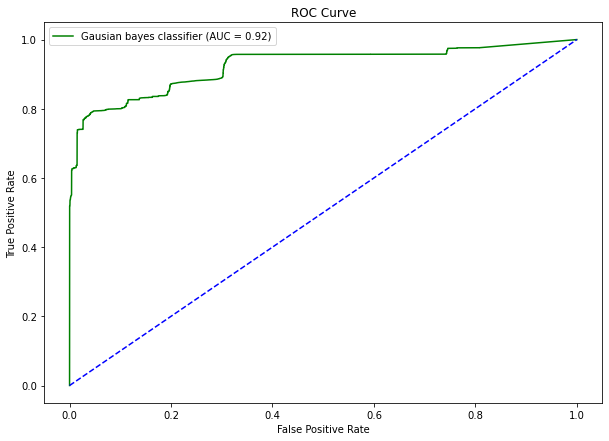

  Classifier  Accuracy  F1-Score  Precision   ROC AUC
0        GNB  0.657716  0.574567   0.673576  0.923801


In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# Positive classes (1) vs BENIGN (0) using provided variable names
positive_classes = ['LDAP', 'NetBIOS', 'Portmap', 'Syn', 'UDP', 'UDPLag']
y_binary = np.where(np.isin(le.inverse_transform(y_test), positive_classes), 1, 0)

# ROC curve
y_pred_prob_binary = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_binary, y_pred_prob_binary)
roc_auc_gnb = auc(fpr, tpr)

# Generate the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='Gausian bayes classifier (AUC = %0.2f)' % roc_auc_gnb, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate metrics
#accuracy = accuracy_score(y_test, y_pred)
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')
precision_gnb = precision_score(y_test, y_pred_gnb, average='weighted')

# Display consolidated results
results_gnb = pd.DataFrame({
    'Classifier': ['GNB'],
    'Accuracy': [accuracy_gnb],
    'F1-Score': [f1_gnb],
    'Precision': [precision_gnb],
    'ROC AUC': [roc_auc_gnb]
})

print(results_gnb)



In [52]:
print(results_rf, results_knn, results_nn,results_auto, results_gnb)

      Classifier  Accuracy  F1-Score  Precision   ROC AUC
0  Random Forest  0.934587  0.934561   0.934539  0.808128   Classifier  Accuracy  F1-Score  Precision   ROC AUC
0        KNN  0.934587  0.934561   0.934539  0.811438        Classifier  Accuracy  F1-Score  Precision   ROC AUC
0  Neural Network   0.93508   0.91379   0.931987  0.595115         Classifier  Accuracy  F1-Score  Precision   ROC AUC
0  Autoencoder +Rf  0.934503  0.934402   0.934316  0.806652   Classifier  Accuracy  F1-Score  Precision   ROC AUC
0        GNB  0.657716  0.574567   0.673576  0.923801


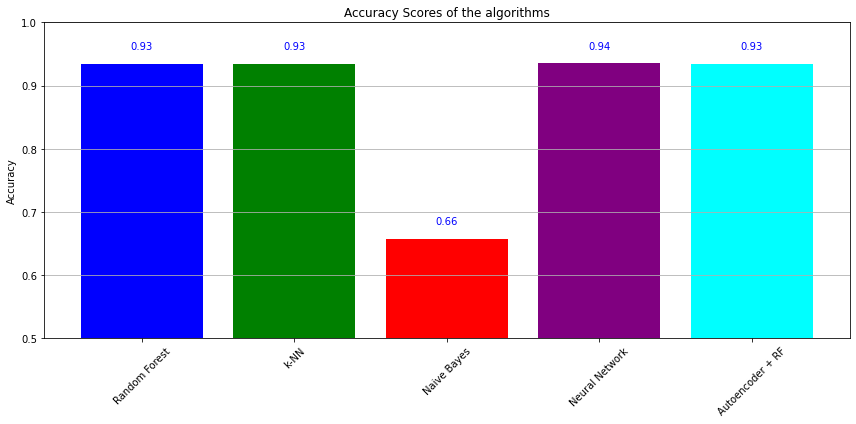

In [60]:
import matplotlib.pyplot as plt

accuracy_scores = {
    "Random Forest": accuracy,  
    "k-NN": accuracy_knn,         
    "Naive Bayes": accuracy_gnb,  
    "Neural Network": accuracy_nn,       
    "Autoencoder + RF": accuracy,                    
}

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple', 'cyan', 'yellow'])
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of the algorithms')
plt.ylim(0.5, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar, score in zip(bars, accuracy_scores.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom', color='blue')

# Display
plt.tight_layout()
plt.show()


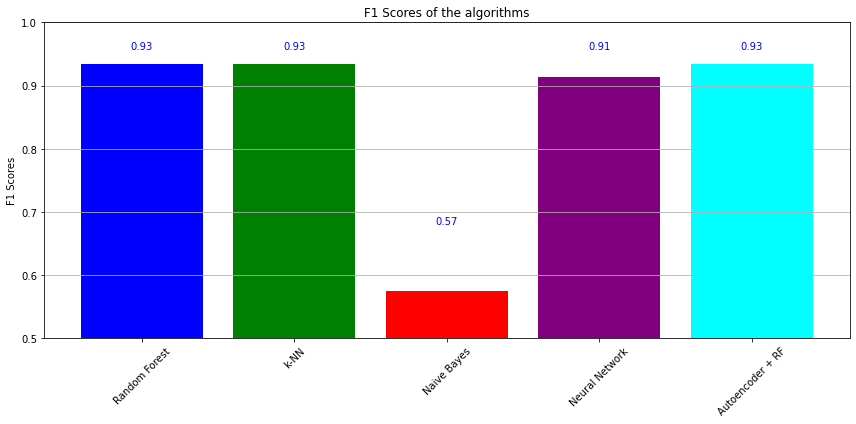

In [80]:
f1_scores = {
    "Random Forest": f1_rf,  
    "k-NN": f1_knn,         
    "Naive Bayes": f1_gnb,  
    "Neural Network": f1_nn,       
    "Autoencoder + RF": f1_auto,                    
}

# Plot
plt.figure(figsize=(12, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green', 'red', 'purple', 'cyan', 'yellow'])
plt.ylabel('F1 Scores')
plt.title('F1 Scores of the algorithms')
plt.ylim(0.5, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar, score in zip(bars, f1_scores.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom', color='blue')

# Display
plt.tight_layout()
plt.show()

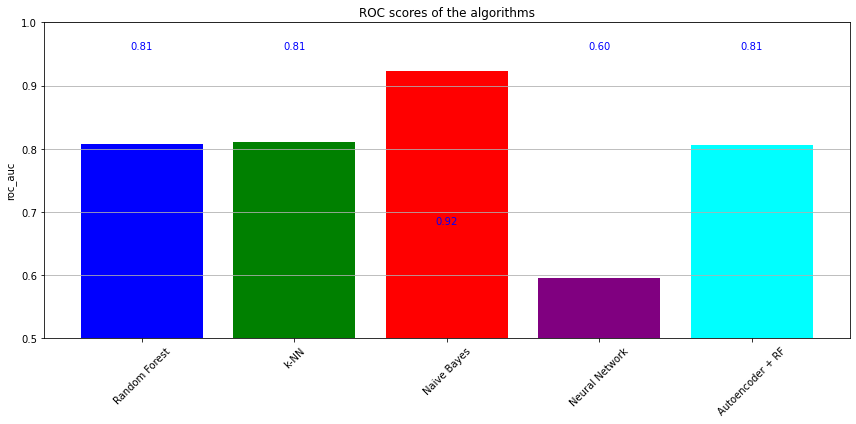

In [82]:
roc_scores = {
    "Random Forest": roc_auc,  
    "k-NN": roc_auc_knn,         
    "Naive Bayes": roc_auc_gnb,  
    "Neural Network": roc_auc_nn,       
    "Autoencoder + RF": roc_auc_auto,                    
}

# Plot
plt.figure(figsize=(12, 6))
plt.bar(roc_scores.keys(), roc_scores.values(), color=['blue', 'green', 'red', 'purple', 'cyan', 'yellow'])
plt.ylabel('roc_auc')
plt.title('ROC scores of the algorithms')
plt.ylim(0.5, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar, score in zip(bars, roc_scores.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom', color='blue')

# Display
plt.tight_layout()
plt.show()

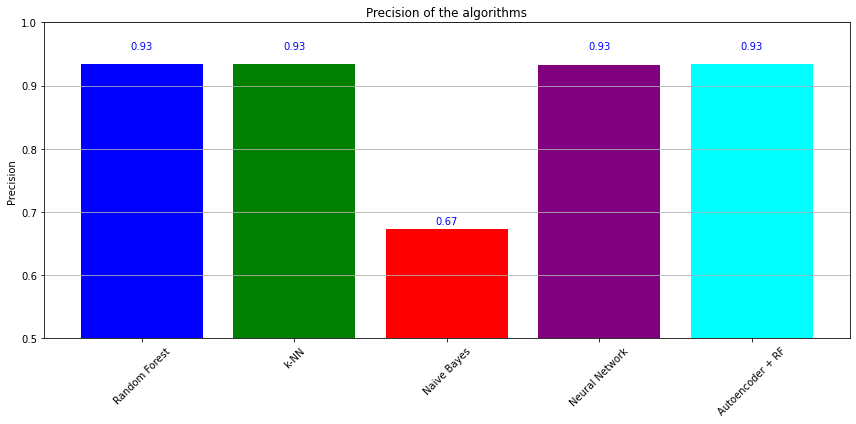

In [85]:
pre_scores = {
    "Random Forest": precision_rf,  
    "k-NN": precision_knn,         
    "Naive Bayes": precision_gnb,  
    "Neural Network": precision_nn,       
    "Autoencoder + RF": precision_auto,                    
}

# Plot
plt.figure(figsize=(12, 6))
plt.bar(pre_scores.keys(), pre_scores.values(), color=['blue', 'green', 'red', 'purple', 'cyan', 'yellow'])
plt.ylabel('Precision')
plt.title('Precision of the algorithms')
plt.ylim(0.5, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar, score in zip(bars, pre_scores.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{score:.2f}', ha='center', va='bottom', color='blue')

# Display
plt.tight_layout()
plt.show()